# 광고 제거

### 크롤링 파일 로드

In [1]:
import pandas as pd
import numpy as np

#크롤링한 데이터 불러오기
data = pd.read_csv('./패션.csv', encoding='utf-8-sig')
data

,Unnamed: 0,time,review,comment,like,url
0,0,2021. 1. 1. 15:34,​ 양 자 ...,[],19,https://blog.naver.com/unheimlich1/222192547494
1,1,2021. 1. 1. 17:00,wish 2021 첫 위시글 눙이 ・ 2021...,[],[],https://blog.naver.com/choisyzzz/222192606190
2,2,2021. 1. 1. 16:57,JeffGame [JeffGame] 2021 맞이 덕질정리 ...,[],4,https://blog.naver.com/san_i1002/222192604007
3,3,2021. 1. 1. 15:26,일상 2021년 롯데백화점 MVG 선정기준 / MVG-CROW...,[],20,https://blog.naver.com/ajs7795/222192542424
4,4,2021. 1. 1. 13:48,블랙패션코디 [올블랙코디] 주인장의 코디 by theblack...,[],[],https://blog.naver.com/kahntata/222192481174
...,...,...,...,...,...,...
328,328,2021. 1. 1. 20:37,FASHION [몬스터리퍼블릭] 컴파운드 메신저백 대학생 가방...,[],24,https://blog.naver.com/kmsy01/222192817612
329,329,2021. 1. 1. 13:50,롬이옷장 20대 여자 가방 추천 / 유니크한 영국 브랜드 [ ...,[],9,https://blog.naver.com/vmflstptm412/222192482625
330,330,2021. 1. 1. 9:00,글귀 다이어트 글귀 명언 자극받고 살빼자! 루시아...,[],[],https://blog.naver.com/rlacofls63/222190596795
331,331,2021. 1. 1. 10:15,Enter 진아름♥남궁민 결혼은 언제? 디스패치 1 1 열애설...,[],[],https://blog.naver.com/force_7/222192347985


In [2]:
del data['Unnamed: 0']
data


,time,review,comment,like,url
0,2021. 1. 1. 15:34,​ 양 자 ...,[],19,https://blog.naver.com/unheimlich1/222192547494
1,2021. 1. 1. 17:00,wish 2021 첫 위시글 눙이 ・ 2021...,[],[],https://blog.naver.com/choisyzzz/222192606190
2,2021. 1. 1. 16:57,JeffGame [JeffGame] 2021 맞이 덕질정리 ...,[],4,https://blog.naver.com/san_i1002/222192604007
3,2021. 1. 1. 15:26,일상 2021년 롯데백화점 MVG 선정기준 / MVG-CROW...,[],20,https://blog.naver.com/ajs7795/222192542424
4,2021. 1. 1. 13:48,블랙패션코디 [올블랙코디] 주인장의 코디 by theblack...,[],[],https://blog.naver.com/kahntata/222192481174
...,...,...,...,...,...
328,2021. 1. 1. 20:37,FASHION [몬스터리퍼블릭] 컴파운드 메신저백 대학생 가방...,[],24,https://blog.naver.com/kmsy01/222192817612
329,2021. 1. 1. 13:50,롬이옷장 20대 여자 가방 추천 / 유니크한 영국 브랜드 [ ...,[],9,https://blog.naver.com/vmflstptm412/222192482625
330,2021. 1. 1. 9:00,글귀 다이어트 글귀 명언 자극받고 살빼자! 루시아...,[],[],https://blog.naver.com/rlacofls63/222190596795
331,2021. 1. 1. 10:15,Enter 진아름♥남궁민 결혼은 언제? 디스패치 1 1 열애설...,[],[],https://blog.naver.com/force_7/222192347985


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   time     333 non-null    object
 1   review   333 non-null    object
 2   comment  333 non-null    object
 3   like     333 non-null    object
 4   url      333 non-null    object
dtypes: object(5)
memory usage: 13.1+ KB


## 광고글 특징
- 1. 특정한 단어를 포함한 게시글 : '제공받아', '지원받아', '해당 업체'...
- 2. 네이버 블로그 특 : 게시글 길이가 3000자 이상이면 광고글일 가능성 높음

### 1번 특징 제거
- 광고글 특징을 stopwords로 지정하여 해당 글은 삭제한다.
- 분석가 판단 하에 추가 광고 문구를 확인하여 stopwords리스트에 추가해준다.

In [4]:
Stopwords = ['제공받아','제공받았','지원받아','지원받았','해당업체','해시태그','업체로부터',
             '체험후기','무상지급받은','무상지급','카카오톡플러스친구','톡톡하세요','네이버톡톡',
             '네이버 톡톡','무상지원','카카오톡 플러스친구','스토리링크','카카오 채널']

In [5]:
#stopwords 가 들어간 글은 삭제
data = data[~data['review'].str.contains('|'.join(Stopwords))] #~은 제거하라는 의미
data = data.reset_index(drop=True)
data

,time,review,comment,like,url
0,2021. 1. 1. 15:34,​ 양 자 ...,[],19,https://blog.naver.com/unheimlich1/222192547494
1,2021. 1. 1. 17:00,wish 2021 첫 위시글 눙이 ・ 2021...,[],[],https://blog.naver.com/choisyzzz/222192606190
2,2021. 1. 1. 16:57,JeffGame [JeffGame] 2021 맞이 덕질정리 ...,[],4,https://blog.naver.com/san_i1002/222192604007
3,2021. 1. 1. 15:26,일상 2021년 롯데백화점 MVG 선정기준 / MVG-CROW...,[],20,https://blog.naver.com/ajs7795/222192542424
4,2021. 1. 1. 13:48,블랙패션코디 [올블랙코디] 주인장의 코디 by theblack...,[],[],https://blog.naver.com/kahntata/222192481174
...,...,...,...,...,...
315,2021. 1. 1. 20:37,FASHION [몬스터리퍼블릭] 컴파운드 메신저백 대학생 가방...,[],24,https://blog.naver.com/kmsy01/222192817612
316,2021. 1. 1. 13:50,롬이옷장 20대 여자 가방 추천 / 유니크한 영국 브랜드 [ ...,[],9,https://blog.naver.com/vmflstptm412/222192482625
317,2021. 1. 1. 9:00,글귀 다이어트 글귀 명언 자극받고 살빼자! 루시아...,[],[],https://blog.naver.com/rlacofls63/222190596795
318,2021. 1. 1. 10:15,Enter 진아름♥남궁민 결혼은 언제? 디스패치 1 1 열애설...,[],[],https://blog.naver.com/force_7/222192347985


#### 2. 게시글 길이가 3천자 이상이면 광고글 상위 노출 조건이기에 제거

In [6]:
ix = data['review'].str.len() >3000
data = data.loc[~ix]
data = data.reset_index(drop=True)
data

,time,review,comment,like,url
0,2021. 1. 1. 15:34,​ 양 자 ...,[],19,https://blog.naver.com/unheimlich1/222192547494
1,2021. 1. 1. 17:00,wish 2021 첫 위시글 눙이 ・ 2021...,[],[],https://blog.naver.com/choisyzzz/222192606190
2,2021. 1. 1. 13:48,블랙패션코디 [올블랙코디] 주인장의 코디 by theblack...,[],[],https://blog.naver.com/kahntata/222192481174
3,2021. 1. 1. 23:08,남성패션 오메가 문워치 프로페셔널 스피드마스터 리뷰(OMEGA...,[],7,https://blog.naver.com/holooks/222193011439
4,2021. 1. 1. 16:19,DAILY 핫딜 직구 르메르 60%세일에 10%추가할인코드 마...,[],1,https://blog.naver.com/jinnkam/222192577430
...,...,...,...,...,...
235,2021. 1. 1. 16:02,게시판 반즈 컴피쿠스 올드스쿨 겟 설이율이 ・ ...,[],46,https://blog.naver.com/cloudiasky/222192566311
236,2021. 1. 1. 20:37,FASHION [몬스터리퍼블릭] 컴파운드 메신저백 대학생 가방...,[],24,https://blog.naver.com/kmsy01/222192817612
237,2021. 1. 1. 13:50,롬이옷장 20대 여자 가방 추천 / 유니크한 영국 브랜드 [ ...,[],9,https://blog.naver.com/vmflstptm412/222192482625
238,2021. 1. 1. 9:00,글귀 다이어트 글귀 명언 자극받고 살빼자! 루시아...,[],[],https://blog.naver.com/rlacofls63/222190596795


In [7]:
import re

In [8]:
def clean_text(texts):
    corpus = []
    for i in range(0, len(texts)):
        review = re.sub(r'[@%\\*=()/~#&\+á?\xc3\xa1\-\|\.\:\;\!\-\,\_\~\$\'\"]', '',str(texts[i])) #remove punctuation
        review = re.sub(r'\d+','', str(texts[i]))# remove number
        review = review.lower() #lower case
        review = re.sub(r'\s+', ' ', review) #remove extra space
        review = re.sub(r'<[^>]+>','',review) #remove Html tags
        review = re.sub(r'\s+', ' ', review) #remove spaces
        review = re.sub(r"^\s+", '', review) #remove space from start
        review = re.sub(r'\s+$', '', review) #remove space from the end
        corpus.append(review)
    return corpus



In [9]:
# 블로그 본문, 댓글 합쳐 하나의 document로 만들기

data['doc']= data['review'] + ' ' + data['comment'] 

In [10]:
from tqdm import tqdm
tqdm.pandas()

# data ['doc'] = data['doc'].progress_apply(lambda x : clean_text(x))

In [11]:
data.doc = data.doc.str.replace('[^가-힣]',' ') #한글만 남기고 특수문자, 숫자, 영어 삭제
data.doc = data.doc.str.replace('\s+', ' ') #white space 삭제

data.head()

C:\Users\user\AppData\Local\Temp\ipykernel_17008\1990641395.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data.doc = data.doc.str.replace('[^가-힣]',' ') #한글만 남기고 특수문자, 숫자, 영어 삭제
C:\Users\user\AppData\Local\Temp\ipykernel_17008\1990641395.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data.doc = data.doc.str.replace('\s+', ' ') #white space 삭제


,time,review,comment,like,url,doc
0,2021. 1. 1. 15:34,​ 양 자 ...,[],19,https://blog.naver.com/unheimlich1/222192547494,양 자 역 학 과 패 션 우리는 왜 누구나 한 번쯤은 아침에 고른 옷이 마음에 안...
1,2021. 1. 1. 17:00,wish 2021 첫 위시글 눙이 ・ 2021...,[],[],https://blog.naver.com/choisyzzz/222192606190,첫 위시글 눙이 복사 이웃추가 본문 기타 기능 공유하기 신고하기 새해가 밝은 기념...
2,2021. 1. 1. 13:48,블랙패션코디 [올블랙코디] 주인장의 코디 by theblack...,[],[],https://blog.naver.com/kahntata/222192481174,블랙패션코디 올블랙코디 주인장의 코디 복사 이웃추가 본문 기타 기능 공유하기 신고...
3,2021. 1. 1. 23:08,남성패션 오메가 문워치 프로페셔널 스피드마스터 리뷰(OMEGA...,[],7,https://blog.naver.com/holooks/222193011439,남성패션 오메가 문워치 프로페셔널 스피드마스터 리뷰 호룩스 복사 이웃추가 본문 기...
4,2021. 1. 1. 16:19,DAILY 핫딜 직구 르메르 60%세일에 10%추가할인코드 마...,[],1,https://blog.naver.com/jinnkam/222192577430,핫딜 직구 르메르 세일에 추가할인코드 마지막날 매치스패션 직구 하러 고고 폴디드백...


In [12]:
data.doc

0       양 자 역 학 과 패 션 우리는 왜 누구나 한 번쯤은 아침에 고른 옷이 마음에 안...
1       첫 위시글 눙이 복사 이웃추가 본문 기타 기능 공유하기 신고하기 새해가 밝은 기념...
2       블랙패션코디 올블랙코디 주인장의 코디 복사 이웃추가 본문 기타 기능 공유하기 신고...
3       남성패션 오메가 문워치 프로페셔널 스피드마스터 리뷰 호룩스 복사 이웃추가 본문 기...
4       핫딜 직구 르메르 세일에 추가할인코드 마지막날 매치스패션 직구 하러 고고 폴디드백...
                             ...                        
235     게시판 반즈 컴피쿠스 올드스쿨 겟 설이율이 복사 이웃추가 본문 기타 기능 공유하기...
236     몬스터리퍼블릭 컴파운드 메신저백 대학생 가방 추천 벚꽃지은 복사 이웃추가 본문 기...
237     롬이옷장 대 여자 가방 추천 유니크한 영국 브랜드 사이먼카터 롬블리 복사 이웃추가...
238     글귀 다이어트 글귀 명언 자극받고 살빼자 루시아 복사 이웃추가 본문 기타 기능 공...
239     진아름 남궁민 결혼은 언제 디스패치 열애설 복사 이웃추가 본문 기타 기능 공유하기...
Name: doc, Length: 240, dtype: object

In [13]:
#검토 후 추가 삭제 문구 적용
data.doc[4]

' 핫딜 직구 르메르 세일에 추가할인코드 마지막날 매치스패션 직구 하러 고고 폴디드백 카메라백 자켓 블레이저 셔츠 원피스 런웨이 케이프코트 트렌치코트 첼시 복사 이웃추가 본문 기타 기능 공유하기 신고하기 르메르 매치스패션 세일 추가할인코드 관부가세 모두 포함가 이상 무료배송 매치스패션 세일 에 추가할인코드오늘이 마지막날이고요 르메르 핫딜 직구 하실분들 지금 고고 미듐 폴디드백 그리고 미니 카메라백 같은 르메르가방 먼저 보시고요 런웨이 피스 후드케이프코트 같은제품이제 몇개안남아서 콜렉트 하실수있는 마지막 기회 귀한 사이즈 가 들어와있는 울블렌드 르메르자켓 도 품절되버리기전에 보세요 트렌치코트 와 원피스 셔츠 같은 웨어러블한 르메르옷도 르메르직구 하시려면 매치스 세일 추가할인 될때 보시고요 할인코드 는 결제단계에서 적용하시면되며 신년 부터는 전부 관부가세포함가로 보여집니다추가요금 없이 매치스패션직구 하세요 매치스패션 세일 여성 전품목 입장 매치스패션 세일 남성 전품목 입장 폴디드 미디엄 레더 숄더백 추가할인가 달러 관부가세포함가 무료배송 카메라 미니 레더 크로스백 추가할인가 달러 관부가세포함가 무료배송 더블 브레스트 울 트윌 자켓 추가할인가 달러 관부가세포함가 무료배송 벨트 코튼 포플린 셔츠 드레스 추가할인가 달러 관부가세포함가 무료배송 후드 코튼 캔버스 케이프 코트 블랙 추가할인가 달러 관부가세포함가 무료배송 후드 코튼 캔버스 케이프 코트 크림 추가할인가 달러 관부가세포함가 무료배송 벨티드 코튼 블렌드 캔버스 코트 추가할인가 달러 관부가세포함가 무료배송 직구하시다가 모르는점은 비댓글 남기시면 답변드립니다 르메르 세일 추가할인 전품목 입장 센스 세일 핫딜 직구 마지막기회 추천아이템 마르지엘라 타비프레임 버킷백 스티치 로퍼 맥케이지 패딩 아크네 머플러 구찌 선글라스 바이파 토템 스카프 외 다수 센스 최대 세일 직구 수입관세포함가 부가세 한국배송료 달러 센스 세일 마르지엘라 타비 스트레치 앵클부츠 유로 기간한정 무료배송 마이테레사 직구하세요 버킷백 글램슬램 클러치 로

In [14]:
data['doc'] = data['doc'].str.replace('첫 위시글  눙이 복사 이웃추가 본문 기타 기능 공유하기 신고하기',' ')
data['doc'] = data['doc'].str.replace('핫딜 직구 르메르 세일에 추가할인코드 마지막날 매치스패션 추가할인코드', ' ')


In [15]:
#csv로 저장
data.to_csv('블로그 전처리.csv', encoding='utf-8-sig')

### 형태소 분석
- 텍스트 분석을 하기 위해서 단어의 형태로 데이터를 처리
- 단어로 만드는 과정에서 1)분석에 불필요한 불용어 제거, 2)단어를 사전형으로 처리(가고 있다 -> '가다', '있다')
- 명사, 형용사, 동사, 부사의 품사만 분석 대상으로 선정

In [16]:
from nltk.corpus import stopwords
import nltk
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
from nltk import word_tokenize


In [17]:
from konlpy.tag import Okt

In [18]:
#원하는 태그 추출 & 불용어 제거
okt =Okt()

#불용어
stopwords = pd.read_csv('./ko-stopwords.csv') #한국어 불용어사전불러오기
stopwords = list(stopwords['stopwords'])
stopwords.extend(['에서','고','이다','는','한','씨', "것","거","게","데","이다","건","고","되다","되어다","걸","기",
                  "시","네","듯","랍니","중이","얘","스","도도", "나","수","개","내","기","제","저","인","있다","이렇다",
                  "그렇다","번","위","팅","분","인","링","란","포","두", "진짜", "하다" ,"이다" ,"가다", "이제" ,"들다"
                 ]) #불용어 추가

stopwords = set(stopwords)

#형태소 분석 함수 만들기
def okt_pos_tagging(string):
    pos_words = okt.pos(string, stem=True, norm=True) #형태소 분석, 단어는 사전형으로 바꿔주기
    words = [word for word, tag in pos_words if tag in['Noun', 'Adjective','Verb','Adverb'] if word not in stopwords]
    return words

In [19]:
#형태소 분석 적용
tokenizing_doc= []
for i in tqdm(data['doc']):
    tokenizing_doc.append(okt_pos_tagging(i))
data['token'] = tokenizing_doc #새로운 tokenizing이라는 칼럼에 키워드 형태로 만든 원문 추가

100%|██████████| 240/240 [00:15<00:00, 15.10it/s]


In [20]:
data.token

0      [양, 역, 학, 패, 션, 아침, 고르다, 옷, 마음, 안, 들어서다, 갈아입다,...
1      [첫, 위시, 글, 눙, 복사, 이웃, 추가, 본문, 기능, 공유, 신고, 새해, ...
2      [블랙, 패션, 코디, 올블랙, 코디, 주인, 코디, 복사, 이웃, 추가, 본문, ...
3      [남성, 패션, 오메가, 워치, 프로, 페셔널, 스피드, 마스터, 리뷰, 호, 룩스...
4      [핫딜, 직구, 르, 메르, 추가, 할인, 코드, 마지막, 날, 매치, 패션, 직구...
                             ...                        
235    [게시판, 반즈, 컴피, 쿠스, 올드스쿨, 설, 이율, 복사, 이웃, 추가, 본문,...
236    [몬스터, 리퍼블릭, 컴, 파운드, 메신저백, 대학생, 가방, 추천, 벚꽃, 지은,...
237    [롬, 옷장, 대다, 여자, 가방, 추천, 유니크, 영국, 브랜드, 사이먼, 카터,...
238    [글귀, 다이어트, 글귀, 명언, 자극받다, 살빼다, 루시아, 복사, 이웃, 추가,...
239    [진아름, 남궁민, 결혼, 디스패치, 열애설, 복사, 이웃, 추가, 본문, 기능, ...
Name: token, Length: 240, dtype: object

In [21]:
#명사 추출
text_noun = [okt.nouns(doc) for doc in data.doc]
data['text_noun'] = text_noun
data['text_noun'] = data.text_noun.apply(lambda x :[a for a in x if a not in stopwords])

In [22]:
data

,time,review,comment,like,url,doc,token,text_noun
0,2021. 1. 1. 15:34,​ 양 자 ...,[],19,https://blog.naver.com/unheimlich1/222192547494,양 자 역 학 과 패 션 우리는 왜 누구나 한 번쯤은 아침에 고른 옷이 마음에 안...,"[양, 역, 학, 패, 션, 아침, 고르다, 옷, 마음, 안, 들어서다, 갈아입다,...","[양, 역, 학, 패, 션, 아침, 옷, 마음, 안, 지각, 경험, 방바닥, 옷, ..."
1,2021. 1. 1. 17:00,wish 2021 첫 위시글 눙이 ・ 2021...,[],[],https://blog.naver.com/choisyzzz/222192606190,첫 위시글 눙이 복사 이웃추가 본문 기타 기능 공유하기 신고하기 새해가 밝은 기념...,"[첫, 위시, 글, 눙, 복사, 이웃, 추가, 본문, 기능, 공유, 신고, 새해, ...","[첫, 위시, 글, 눙, 복사, 이웃, 추가, 본문, 기능, 공유, 신고, 새해, ..."
2,2021. 1. 1. 13:48,블랙패션코디 [올블랙코디] 주인장의 코디 by theblack...,[],[],https://blog.naver.com/kahntata/222192481174,블랙패션코디 올블랙코디 주인장의 코디 복사 이웃추가 본문 기타 기능 공유하기 신고...,"[블랙, 패션, 코디, 올블랙, 코디, 주인, 코디, 복사, 이웃, 추가, 본문, ...","[블랙, 패션, 코디, 올블랙, 코디, 주인, 코디, 복사, 이웃, 추가, 본문, ..."
3,2021. 1. 1. 23:08,남성패션 오메가 문워치 프로페셔널 스피드마스터 리뷰(OMEGA...,[],7,https://blog.naver.com/holooks/222193011439,남성패션 오메가 문워치 프로페셔널 스피드마스터 리뷰 호룩스 복사 이웃추가 본문 기...,"[남성, 패션, 오메가, 워치, 프로, 페셔널, 스피드, 마스터, 리뷰, 호, 룩스...","[남성, 패션, 오메가, 워치, 프로, 페셔널, 스피드, 마스터, 리뷰, 호, 룩스..."
4,2021. 1. 1. 16:19,DAILY 핫딜 직구 르메르 60%세일에 10%추가할인코드 마...,[],1,https://blog.naver.com/jinnkam/222192577430,핫딜 직구 르메르 세일에 추가할인코드 마지막날 매치스패션 직구 하러 고고 폴디드백...,"[핫딜, 직구, 르, 메르, 추가, 할인, 코드, 마지막, 날, 매치, 패션, 직구...","[핫딜, 직구, 르, 메르, 추가, 할인, 코드, 마지막, 날, 매치, 패션, 직구..."
...,...,...,...,...,...,...,...,...
235,2021. 1. 1. 16:02,게시판 반즈 컴피쿠스 올드스쿨 겟 설이율이 ・ ...,[],46,https://blog.naver.com/cloudiasky/222192566311,게시판 반즈 컴피쿠스 올드스쿨 겟 설이율이 복사 이웃추가 본문 기타 기능 공유하기...,"[게시판, 반즈, 컴피, 쿠스, 올드스쿨, 설, 이율, 복사, 이웃, 추가, 본문,...","[게시판, 반즈, 컴피, 쿠스, 올드스쿨, 설, 이율, 복사, 이웃, 추가, 본문,..."
236,2021. 1. 1. 20:37,FASHION [몬스터리퍼블릭] 컴파운드 메신저백 대학생 가방...,[],24,https://blog.naver.com/kmsy01/222192817612,몬스터리퍼블릭 컴파운드 메신저백 대학생 가방 추천 벚꽃지은 복사 이웃추가 본문 기...,"[몬스터, 리퍼블릭, 컴, 파운드, 메신저백, 대학생, 가방, 추천, 벚꽃, 지은,...","[몬스터, 리퍼블릭, 컴, 파운드, 메신저백, 대학생, 가방, 추천, 벚꽃, 지은,..."
237,2021. 1. 1. 13:50,롬이옷장 20대 여자 가방 추천 / 유니크한 영국 브랜드 [ ...,[],9,https://blog.naver.com/vmflstptm412/222192482625,롬이옷장 대 여자 가방 추천 유니크한 영국 브랜드 사이먼카터 롬블리 복사 이웃추가...,"[롬, 옷장, 대다, 여자, 가방, 추천, 유니크, 영국, 브랜드, 사이먼, 카터,...","[롬, 옷장, 여자, 가방, 추천, 유니크, 영국, 브랜드, 사이먼, 카터, 롬블리..."
238,2021. 1. 1. 9:00,글귀 다이어트 글귀 명언 자극받고 살빼자! 루시아...,[],[],https://blog.naver.com/rlacofls63/222190596795,글귀 다이어트 글귀 명언 자극받고 살빼자 루시아 복사 이웃추가 본문 기타 기능 공...,"[글귀, 다이어트, 글귀, 명언, 자극받다, 살빼다, 루시아, 복사, 이웃, 추가,...","[글귀, 다이어트, 글귀, 명언, 루시아, 복사, 이웃, 추가, 본문, 기능, 공유..."


#### wordcloud

In [23]:
#리스트 차원 낮춰주는 함수 생성
def flatten(l):
    flatlist = []
    for elem in l:
        if type(elem) == list:
            for e in elem:  
                flatlist.append(e)
        else:
            flatlist.append(elem)
    return flatlist
            

In [24]:
data1 = data.token.tolist() #series -> list
data2 = flatten(data1)
data2[:20]

['양',
 '역',
 '학',
 '패',
 '션',
 '아침',
 '고르다',
 '옷',
 '마음',
 '안',
 '들어서다',
 '갈아입다',
 '지각',
 '경험',
 '방바닥',
 '옷',
 '널브러져',
 '나중',
 '치우다',
 '뿐']

In [25]:
text = nltk.Text(data2)
text

<Text: 양 역 학 패 션 아침 고르다 옷...>

In [26]:
from wordcloud import WordCloud

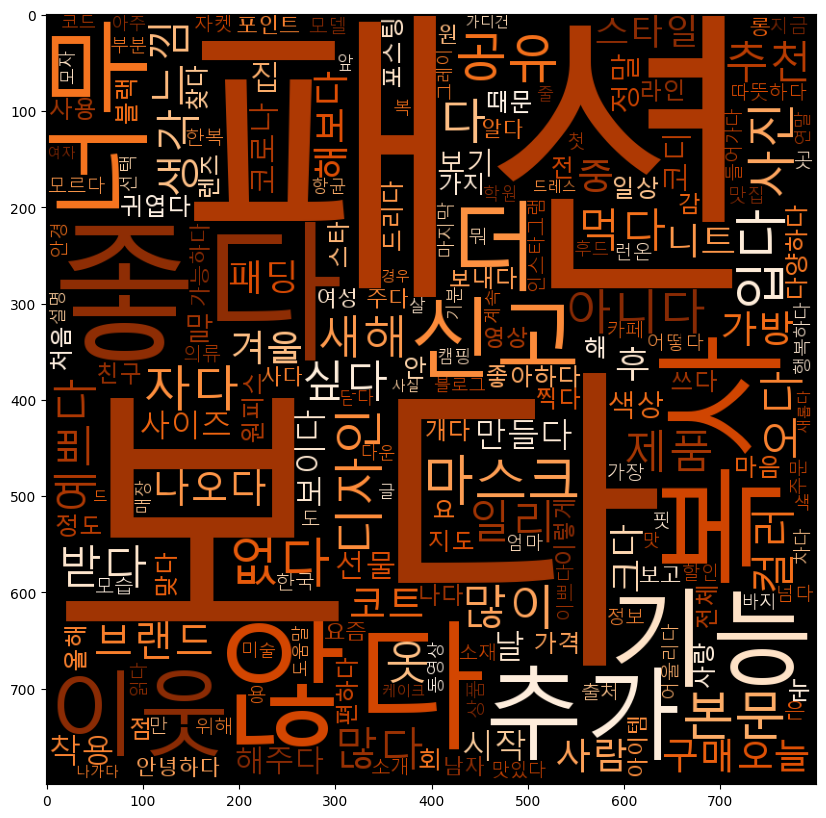

In [27]:
#명사, 동사, 형용사, 부사로 워드 클라우드
import matplotlib.pyplot as plt
font_path = 'C:/Windows/Fonts/malgun.ttf'

wordclouds = WordCloud(width=800,
                       height=800,
                       background_color='Black',
                       colormap='Oranges',
                       font_path= font_path)

from collections import Counter
count = Counter(text)
wordclouds = wordclouds.generate_from_frequencies(count)

fig = plt.figure(figsize=(10,10))
plt.imshow(wordclouds.to_array())
plt.show()


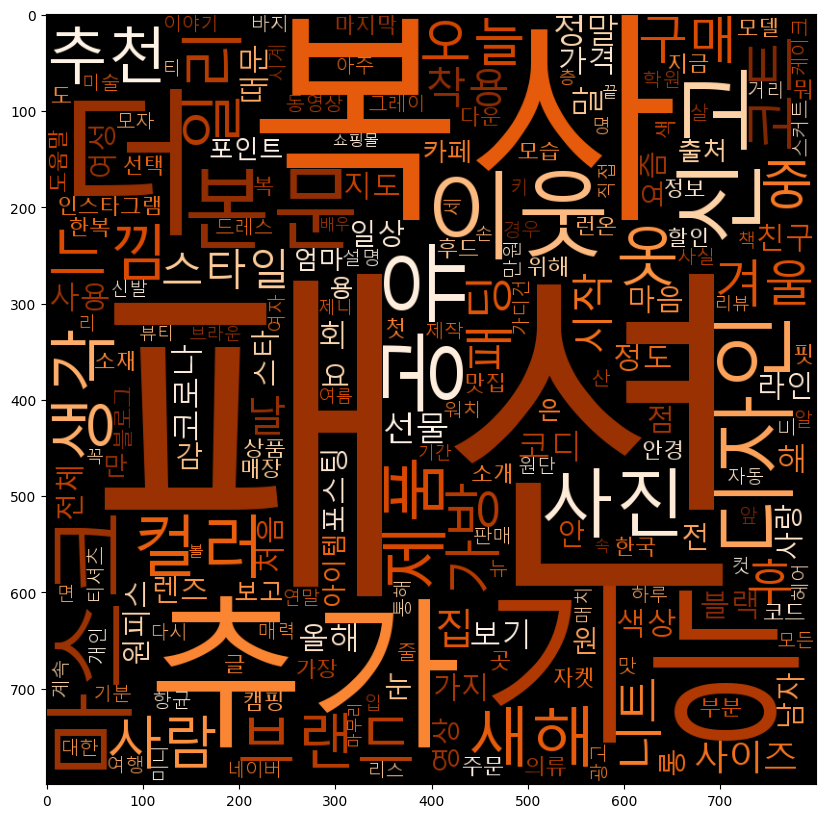

In [28]:
#명사로만 워드클라우드
df_noun = data.text_noun.tolist()
df_noun2 = flatten(df_noun)
text2 = nltk.Text(df_noun2)

wordclouds = WordCloud(width=800,
                       height=800,
                       background_color='Black',
                       colormap='Oranges',
                       font_path= font_path)
count = Counter(text2)
wordclouds = wordclouds.generate_from_frequencies(count)

fig = plt.figure(figsize=(10,10))
plt.imshow(wordclouds.to_array())
plt.show()

# 군집분석 -clusttering(Actor 도출)

### tf-idf

In [29]:
data3 = []

for i in data1:
    string = i[0]
    for w in i[1:]: #첫번째 이후 단어부터 토큰으로 이어 붙여줌
        string += " " #단어사이는 띄어쓰기로 연결
        string += w # 다음 단어 입력 반복
    data3.append(string)
data3 #쉼표를 기준으로 document가 구분됨(,)

['양 역 학 패 션 아침 고르다 옷 마음 안 들어서다 갈아입다 지각 경험 방바닥 옷 널브러져 나중 치우다 뿐 아니다 갈아입다 지각 크다 손해 아니다 없다 입다 옷차림 마음 않다 보다 하루 종일 똥 싸다 나서다 밑 안 닦다 사람 찜찜하다 이래저래 절 절 날 곰곰 생각 빠지다 어떻다 옷 입 소비 최대한 절약 최대 효과 얻다 장고 끝 묘수 발견 혈기 왕성 세 소년 발기 남근 벌떡 일어나다 유레카 외치다 시바 모양 색깔 셔츠 벌 일일이 입다 셔츠 맞다 넥타이 색깔 원단 모양 고르다 그냥 궁합 자다 맞다 셔츠 넥타이 아니다 최고 찰떡 궁합 찾다 작업 펼치다 나서다 방식 바지 자켓 신발 액세서리 고르다 이렇게 선택 조합 옷 걸이 걸다 두다 신발 옷 걸이 걸다 두다 행거 밑 배치 다 방식 옷 걸이 만들다 그리다 색깔 색깔 옷 걸이 이름 부여 다 화 목 금 토 이쯤 의도 예측 가능하다 월요일 월요일 이름 옷 걸이 꺼내다 입다 화요일 화요일 이름 옷 걸이 꺼내다 입다 방식 선택 바쁘다 아침 옷 고르다 소비 절약 뿐 아니다 실패 확률 낮추다 소비 만족도 높이다 날 새롭다 조합 옷 입다 날 옷 입다 바람 동료 전날 밤 벌어지다 의심 눈초리 지우다 방식 주가 지나다 주말 옷 세탁 후 다시 조합 옷 구성 끝 아이디어 매우 크게 만족하다 아이디어 핵심 미래 대한 불확실 예측 가능하다 설계 내내 앞 입 옷 조합 정해지다 미래 불확실 성은 사라지다 불확실 사라지다 불안 불만 사라지다 그것 착각 일주일 설계 방식 진행 월요일 월요일 이름 옷 걸이 꺼내다 입다 화요일 화요일 이름 옷 걸이 수요일 목요일 금요일 주차 접다 균열 발생 시작 완벽하다 조합 극찬 월요일 이름 옷 걸이 걸리다 셔츠 컬러 넥타이 조합 너무 촌스럽다 보이다 아니다 일주일 전만 해도 신의 조합 생각 보다 년대 장소 춘자 만담 촌 보이다 없이 금요일 이름 옷 걸이 걸리다 넥타이 꺼내다 넥타이 매다 작다 변화 모든 엉망 만들다 줄 모르다 화요일 화요일 이름 옷 걸이 걸리다 셔츠 눈 거슬리다 시작 시바 쌍 파다 도 체크 패턴 

In [30]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer

vectorizer = TfidfVectorizer()
sp_matrix = vectorizer.fit_transform(data3)

In [31]:
from collections import defaultdict
word2id = defaultdict(lambda:0) #value가 없는 key인경우 error 대신 0을 출력

In [32]:
for idx, feature in enumerate(vectorizer.get_feature_names()):
    word2id[feature] = idx

c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [33]:
tfidf = []
for i, sent in enumerate(data3):
    tfidf.append([(token, sp_matrix[i, word2id[token]]) for token in sent.split()])

In [34]:
tfidf[4]

[('핫딜', 0.08623670293971157),
 ('직구', 0.37043354117161786),
 ('르', 0.0),
 ('메르', 0.19241232574911288),
 ('추가', 0.10285797134112563),
 ('할인', 0.4199049817412025),
 ('코드', 0.1996068406841632),
 ('마지막', 0.06362496332880559),
 ('날', 0.0),
 ('매치', 0.14185862103288094),
 ('패션', 0.04563425474533152),
 ('직구', 0.37043354117161786),
 ('고고', 0.060735062056729204),
 ('폴디드백', 0.06530712003963912),
 ('카메라', 0.07937861596534669),
 ('자켓', 0.0574023829152253),
 ('블', 0.0),
 ('레이저', 0.030367531028364602),
 ('셔츠', 0.06765463884559957),
 ('원피스', 0.03776701353775659),
 ('런웨이', 0.06530712003963912),
 ('케이프', 0.13061424007927824),
 ('코트', 0.13218454738214808),
 ('트렌치코트', 0.054974950214032245),
 ('첼시', 0.028745567646570522),
 ('복사', 0.006025355091555645),
 ('이웃', 0.006050468902419155),
 ('추가', 0.10285797134112563),
 ('본문', 0.006075695079700873),
 ('기능', 0.006000352650507479),
 ('공유', 0.006050468902419155),
 ('신고', 0.006050468902419155),
 ('르', 0.0),
 ('메르', 0.19241232574911288),
 ('매치', 0.14185862103288094),


## 토픽 개수 정하기

In [35]:
from gensim import corpora, models

dictionary = corpora.Dictionary(data1)
dictionary

In [36]:
#tuple로 mapping해주는 함수, doc2bow
corpus = [dictionary.doc2bow(text) for text in data1]

In [37]:
corpus[:1]

[[(0, 1),
  (1, 2),
  (2, 3),
  (3, 2),
  (4, 1),
  (5, 1),
  (6, 3),
  (7, 3),
  (8, 12),
  (9, 1),
  (10, 2),
  (11, 4),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 2),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 2),
  (24, 4),
  (25, 2),
  (26, 1),
  (27, 2),
  (28, 1),
  (29, 4),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 2),
  (34, 2),
  (35, 1),
  (36, 5),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 2),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 2),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 3),
  (58, 1),
  (59, 1),
  (60, 2),
  (61, 1),
  (62, 1),
  (63, 2),
  (64, 2),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 2),
  (70, 2),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 5),
  (77, 1),
  (78, 2),
  (79, 3),
  (80, 1),
  (81, 1),
  (82, 2),
  (83, 1),
  (84, 1),
  (85, 1),
  (86, 1),
  (87, 1),
  (88, 5),
  (89, 1),
  (90, 1),
  (91, 1

In [38]:
import gensim

In [39]:
#coherence 확인(군집평가)
from gensim.models import CoherenceModel

coherence_values = []
for i in range(2, 10):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus,
                                              num_topics=i,
                                              id2word=dictionary)
    
    coherence_model_lda = CoherenceModel(model=ldamodel,
                                        texts = data1,
                                        dictionary=dictionary,
                                        topn=10)
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_values.append(coherence_lda)


Text(0, 0.5, 'Score')

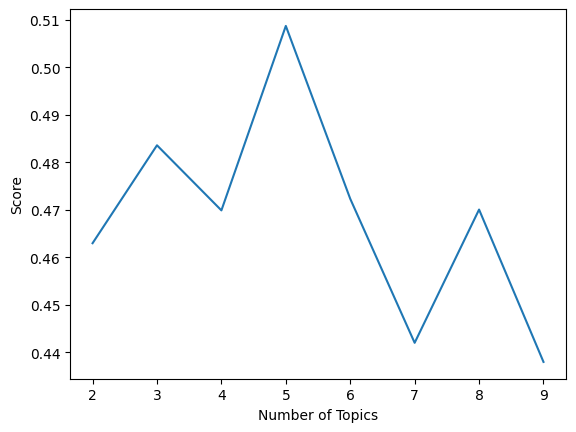

In [40]:
X = range(2,10)
plt.plot(X, coherence_values)
plt.xlabel('Number of Topics')
plt.ylabel('Score')

In [41]:
values = []
for i in range(2,10):
    ldamodel = gensim.models.LdaModel(corpus, num_topics=i, id2word=dictionary)
    
    values.append(ldamodel.log_perplexity(corpus))

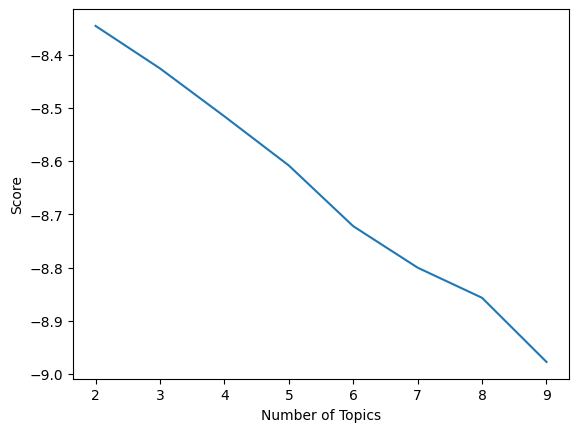

In [42]:
x = range(2,10)
plt.plot(x,values)
plt.xlabel('Number of Topics')
plt.ylabel('Score')
plt.show()

### Ward Clustering
- 데이터의 수직적인 구조를 파악할 수 있음

In [43]:
#라이브러리 import
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

In [44]:
sp_matrix1 = vectorizer.fit_transform(data3)

In [45]:
df1 = pd.DataFrame(sp_matrix1.toarray(), columns=vectorizer.get_feature_names())

c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [46]:
cluster = AgglomerativeClustering(n_clusters=6, linkage='ward')

In [47]:
result = cluster.fit_predict(df1)

In [48]:
df_ward = data.copy()

In [49]:
df_ward['cluster'] = list(result)

In [50]:
df_ward.head()

,time,review,comment,like,url,doc,token,text_noun,cluster
0,2021. 1. 1. 15:34,​ 양 자 ...,[],19,https://blog.naver.com/unheimlich1/222192547494,양 자 역 학 과 패 션 우리는 왜 누구나 한 번쯤은 아침에 고른 옷이 마음에 안...,"[양, 역, 학, 패, 션, 아침, 고르다, 옷, 마음, 안, 들어서다, 갈아입다,...","[양, 역, 학, 패, 션, 아침, 옷, 마음, 안, 지각, 경험, 방바닥, 옷, ...",2
1,2021. 1. 1. 17:00,wish 2021 첫 위시글 눙이 ・ 2021...,[],[],https://blog.naver.com/choisyzzz/222192606190,첫 위시글 눙이 복사 이웃추가 본문 기타 기능 공유하기 신고하기 새해가 밝은 기념...,"[첫, 위시, 글, 눙, 복사, 이웃, 추가, 본문, 기능, 공유, 신고, 새해, ...","[첫, 위시, 글, 눙, 복사, 이웃, 추가, 본문, 기능, 공유, 신고, 새해, ...",0
2,2021. 1. 1. 13:48,블랙패션코디 [올블랙코디] 주인장의 코디 by theblack...,[],[],https://blog.naver.com/kahntata/222192481174,블랙패션코디 올블랙코디 주인장의 코디 복사 이웃추가 본문 기타 기능 공유하기 신고...,"[블랙, 패션, 코디, 올블랙, 코디, 주인, 코디, 복사, 이웃, 추가, 본문, ...","[블랙, 패션, 코디, 올블랙, 코디, 주인, 코디, 복사, 이웃, 추가, 본문, ...",0
3,2021. 1. 1. 23:08,남성패션 오메가 문워치 프로페셔널 스피드마스터 리뷰(OMEGA...,[],7,https://blog.naver.com/holooks/222193011439,남성패션 오메가 문워치 프로페셔널 스피드마스터 리뷰 호룩스 복사 이웃추가 본문 기...,"[남성, 패션, 오메가, 워치, 프로, 페셔널, 스피드, 마스터, 리뷰, 호, 룩스...","[남성, 패션, 오메가, 워치, 프로, 페셔널, 스피드, 마스터, 리뷰, 호, 룩스...",2
4,2021. 1. 1. 16:19,DAILY 핫딜 직구 르메르 60%세일에 10%추가할인코드 마...,[],1,https://blog.naver.com/jinnkam/222192577430,핫딜 직구 르메르 세일에 추가할인코드 마지막날 매치스패션 직구 하러 고고 폴디드백...,"[핫딜, 직구, 르, 메르, 추가, 할인, 코드, 마지막, 날, 매치, 패션, 직구...","[핫딜, 직구, 르, 메르, 추가, 할인, 코드, 마지막, 날, 매치, 패션, 직구...",2


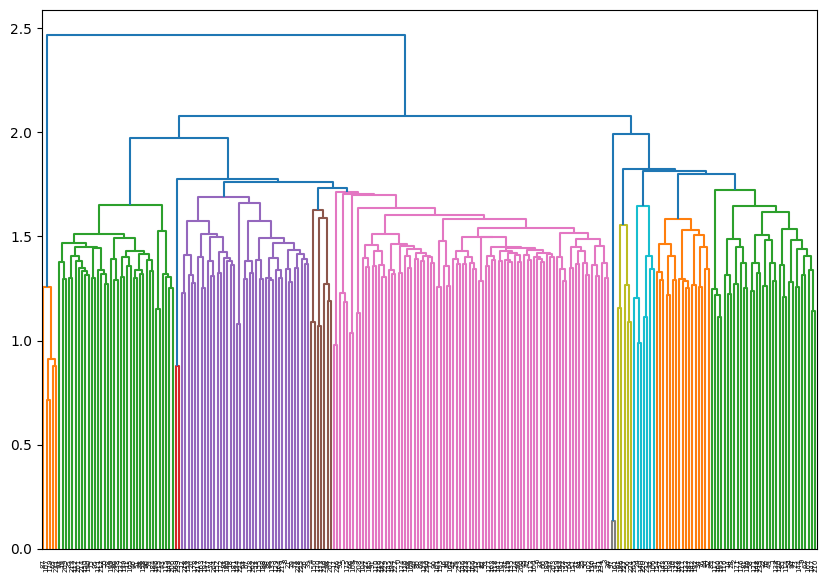

In [51]:
plt.figure(figsize=(10,7))
dend = shc.dendrogram(shc.linkage(df1, method='ward'))

In [52]:
#파일 저장
import pickle
df_ward.to_pickle('패션_ward.pkl')
df_ward.to_csv('패션_clustering.csv',encoding='utf-8-sig')